In [1]:
%load_ext autoreload
%autoreload 2

# import matplotlib
# matplotlib.use('qt5agg')

from colors_utils import *

You have 2 functions available to load and plot (optional bool 'plot') spectrums for Opsins and LEDs. These functions are also used in other function to load datasets for computation purposes so it is recommended to format the data as the examples provided to make your life easier. Datasets are stored as dictionnaries with leds colors as keys (defaults are 'Violet', 'Blue', 'Green', 'Yellow', 'Red') or Opsins names as keys (default are 'Scones', 'Mela', 'Rods', 'Mcones', 'RedOpsin') and sectrum in µW/cm2/λ for leds and isomerisation/s/λ for opsins. Datasets also contains the range of wavelength measures for spectrums. They need to be identical for all opsins and leds, are stored as 'x_axis' and usally range from 300nm to 700nm.  

# Understanding the Dataset Structure for Opsins and LEDs

This notebook explains the structure of the datasets used for computing isomerisation rates and visualizing spectral distributions of opsins and LEDs. These datasets are stored as Python dictionaries and can be loaded using the provided functions.

## Dataset Overview

Each dataset is stored as a dictionary where:
- **For LEDs**: Keys represent LED colors (default: `'Violet'`, `'Blue'`, `'Green'`, `'Yellow'`, `'Red'`), and values store the spectral power distribution in **µW/cm²/λ**.
- **For Opsins**: Keys represent opsin names (default: `'Scones'`, `'Mela'`, `'Rods'`, `'Mcones'`, `'RedOpsin'`), and values store the isomerisation rate in **isomerisations/s/λ**.

### Wavelength Range
- Both datasets contain an **x-axis key (`'x_axis'`)** that stores the wavelength range (usually from **300 nm to 700 nm**).
- It is crucial that the wavelength values are identical across both datasets to ensure compatibility in calculations.

## Loading and Plotting Spectrums
The functions `prSpectrums()` and `ledSpectrums()` are available to:
- Load the respective datasets.
- Optionally plot the spectra by setting `plot=True`.

### Expected Data Format
Each dataset follows this structure:



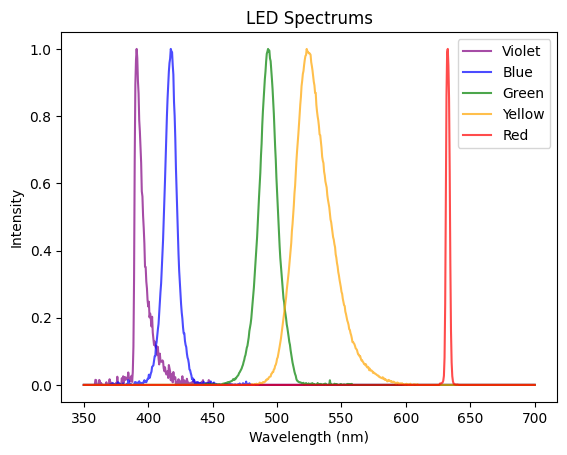

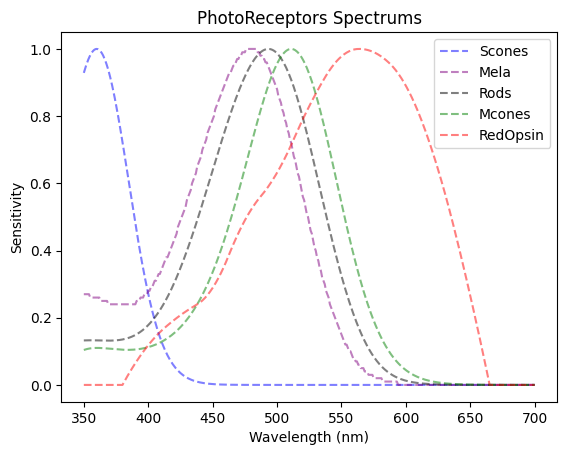

In [2]:
opsinDATA_path="./PhotoReceptorData.pkl"
ledDATA_path="./IlluminationData.pkl"

ledSpectrum = ledSpectrums(path = ledDATA_path, plot=True)
plt.figure()
prSpectrum = prSpectrums(path = opsinDATA_path, plot=True)
plt.show()
plt.close('all')

#### **📌Opsin Dataset (`PhotoReceptorData.pkl`)**
```python
{
    "x_axis": np.array([...]),  # Wavelength range (300 nm to 700 nm)
    "Scones": np.array([...]),  # Sensitivity spectrum (isomerisations/s/λ)
    "Mela": np.array([...]),
    "Rods": np.array([...]),
    "Mcones": np.array([...]),
    "RedOpsin": np.array([...])
}
```
#### **📌LED Dataset (`IlluminationData.pkl`)**
```python

{
    "x_axis": np.array([...]),  # Wavelength range (300 nm to 700 nm)
    "Violet": np.array([...]),  # Spectral power distribution (µW/cm²/λ)
    "Blue": np.array([...]),
    "Green": np.array([...]),
    "Yellow": np.array([...]),
    "Red": np.array([...])
}


To load new leds and adapt their x_axis, you can use the following types of lines. 

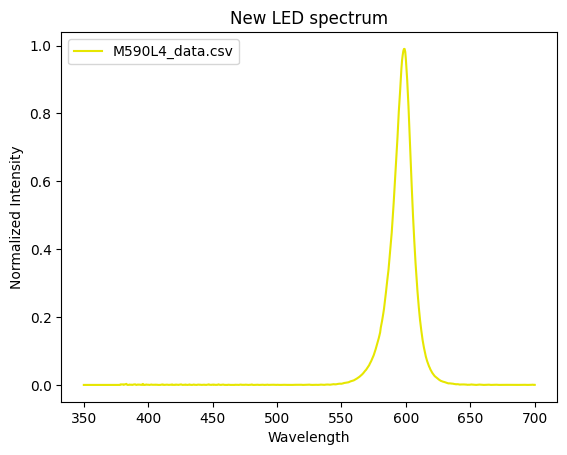

In [3]:
from scipy.interpolate import interp1d

led_file = 'M590L4_data.csv'
led590_data = np.genfromtxt(led_file, delimiter=' ')

# Create an interpolation function
led590 = interp1d(led590_data[:,0],led590_data[:,1], kind='linear', fill_value="extrapolate")


# Get the interpolated intensities for the x_axis
plt.plot(ledSpectrum['x_axis'], led590(ledSpectrum['x_axis']), label=led_file, color=get_led_color(led590(ledSpectrum['x_axis']), ledSpectrum['x_axis']))

plt.legend()
plt.title('New LED spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Intensity')
plt.show()
plt.close('all')


# 🎛️ Interactive Isomerisation Exploration

This function provides an interactive tool for exploring isomerisation rates by adjusting LED intensities. It uses predefined datasets for opsins and LEDs, allowing quick visualization of spectral responses. You can tune it according to your data by providing 

Following features are all customizable.

### 🔹Key Features:
- **Adjustable LED Intensities**: Sliders let you modify the power of selected LEDs.
- **Opsin Selection**: Choose which opsins to analyze.
- **Real-Time Plotting**: Updates isomerisation values dynamically.

### 🔹Data Requirements:
- **LED & Opsin Datasets**: Stored as dictionaries in pickle files (`PhotoReceptorData.pkl` & `IlluminationDataMEA2.pkl`).
- **Wavelength Alignment**: All spectrums must share the same x-axis (`'x_axis'`).

### 🔹Default Settings:
- LEDs: `'Violet'`, `'Blue'`, `'Green'`, `'Yellow'`, `'Red'`
- Opsins: `'Scones'`, `'Mela'`, `'Rods'`, `'Mcones'`, `'RedOpsin'`
- LED power limits and colors are customizable.

Use this tool to fine-tune LED intensities and visualize their impact on opsin activation.

📖 *For a complete breakdown of parameters and output, check the function description.*


In [4]:
interactive_Ptot_slider(colors={})

Led Violet color for plotting not defined. Plotting with automatic coloring.
Led Blue color for plotting not defined. Plotting with automatic coloring.
Led Green color for plotting not defined. Plotting with automatic coloring.
Led Yellow color for plotting not defined. Plotting with automatic coloring.
Led Red color for plotting not defined. Plotting with automatic coloring.
LED Power Values (µW/cm²):
Violet: 1.000
Blue: 1.000
Green: 1.000
Yellow: 1.000
Red: 0.000

Opsin Isomerization Values:
Scones: [1778]
Mela: [9671]
Rods: [25328]
Mcones: [9781]
RedOpsin: [86]


# ⚡ Compute Isomerisation Rates

This function calculates isomerisation rates for selected opsins under specific LED power settings. It provides a quick way to get isomerisation but recalculates the isomerisation matrix each time. For optimized performance, consider computing multiple rates using the same matrix. This is a higher level function see bellow for a lower level way to compute isomerisation.

The matrix structure is (n_opsins,n_leds). If you read a line you get all the various isomerisation due to each leds. If you read a column you read all the isomerisation an led is generating

### 🔹 Key Features:
- Accepts a list of LED power values and corresponding LED names.
- Can return either the total isomerisation rates per opsin or the full isomerisation matrix where you have the contribution of each led to the isomerisation of each opsin.
- Ensures consistency between selected LEDs and available LED datasets.
- Supports detailed output with `verbose=True`.

### 📌 Usage Notes:
- Ensure that selected LEDs exist in the provided LED dataset.
- If multiple computations are needed, you should reuse the isomerisation matrix for increased efficiency instead of using this fonction (see bellow)

📖 *For a complete breakdown of parameters and output, check the function description.*


In [5]:
Ptot =  [1,1,2,10]

selected_LEDs = ['Blue', 'Green', 'Yellow', 'Red']
selected_opsins = ["Scones", "Mela", "Rods", "Mcones", "RedOpsin"]


isomerisation_Ptot = get_isomerisations(Ptot, selected_LEDs, matrix=True, selected_opsins=selected_opsins)

print("\n\nResult if 'matrix' is True :\n")
for row in isomerisation_Ptot:
    print("[\t" + "\t".join([f"{elem:.0f}" for elem in row]) + "\t]")


Ptot with 4 LED Power Values (µW/cm²):
Blue: 0.000
Green: 1.000
Yellow: 1.000
Red: 2.000

Isomerisation rate:
Scones: 3.4e+02
Mela: 1.1e+04
Rods: 3.2e+04
Mcones: 1.4e+04
RedOpsin: 4.7e+02


Result if 'matrix' is True :

[	0	339	0	0	0	]
[	0	1732	4586	4532	0	]
[	0	3015	12149	16894	128	]
[	0	629	4343	8724	261	]
[	0	8	29	91	342	]


In [6]:
Ptot =  [1,1,2,10]

selected_LEDs = ['Blue', 'Green', 'Yellow', 'Red']
selected_opsins = ["Scones", "Mela", "Rods", "Mcones", "RedOpsin"]


isomerisation_Ptot_vector = get_isomerisations(Ptot, selected_LEDs, matrix=False, selected_opsins=selected_opsins)

print("\n\nResult if 'matrix' is False (Default) :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in isomerisation_Ptot_vector]) + "\t]")

compressed_vector = isomerisation_Ptot.sum(axis=1) #keep dim allows to maintain the column vector
print("\n\nNote that you can retrive the second vector from the first matrix using numpy .sum(axis=1) method :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in compressed_vector]) + "\t]")


Ptot with 4 LED Power Values (µW/cm²):
Blue: 0.000
Green: 1.000
Yellow: 1.000
Red: 2.000

Isomerisation rate:
Scones: 3.4e+02
Mela: 1.1e+04
Rods: 3.2e+04
Mcones: 1.4e+04
RedOpsin: 4.7e+02


Result if 'matrix' is False (Default) :

[	340	10849	32185	13957	470	]


Note that you can retrive the second vector from the first matrix using numpy .sum(axis=1) method :

[	340	10849	32185	13957	470	]


###  **⚠️ Caution ⚠️** 
Testing for equality (`==`) between a vector and its compressed matrix representation may not return `True` due to potential computational errors or floating-point precision issues.


### 🛠️ For a more thorough analysis, you may want to manage the data yourself. 
### Below are some methods to help you do that : 


In [7]:
Ptot = np.array([1, 1, 1, 1, 1])

selected_LEDs = ['Violet', 'Blue', 'Green', 'Yellow', 'Red']
selected_opsins = ["Scones", "Mela", "Rods", "Mcones"]

isomerisation_matrix = get_isomerisation_matrix(selected_opsins, selected_LEDs) 

# Compute the full matrixmatrix
isomerisation_Ptot = (isomerisation_matrix * Ptot)

print("Result using matrix ouptput :\n")
for row in isomerisation_Ptot:
    print("[\t" + "\t".join([f"{elem:.0f}" for elem in row]) + "\t]")

    
compressed_vector = isomerisation_Ptot.sum(axis=1) #keep dim allows to maintain the column vector
print("\n\nAgain you can retrive the second vector from the first matrix using numpy .sum(axis=1) method :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in compressed_vector]) + "\t]")

Result using matrix ouptput :

[	1439	339	0	0	0	]
[	1088	1732	4586	2266	0	]
[	1718	3015	12149	8447	13	]
[	447	629	4343	4362	26	]


Again you can retrive the second vector from the first matrix using numpy .sum(axis=1) method :

[	1778	9672	25342	9807	]


In [8]:
Ptot = np.array([1, 1, 1, 1, 1])

selected_LEDs = ['Violet', 'Blue', 'Green', 'Yellow', 'Red']
selected_opsins = ["Scones", "Mela", "Rods", "Mcones"]

isomerisation_matrix = get_isomerisation_matrix(selected_opsins, selected_LEDs) 

# Compute the full matrixmatrix
isomerisation_Ptot_vector = (isomerisation_matrix @ Ptot.reshape((-1,1))).reshape(-1)

                                                                # It may seem irrelevant these reshaping but
                                                                # But it is useful when comparing vectors
                                                                # Otherwise you may have some np matrix 
                                                                # multiplications shenanigans. You need to
                                                                # enforce Ptot as column vec for the @ 
                    

print("Result using vector ouptput :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in isomerisation_Ptot_vector]) + "\t]")

Result using vector ouptput :

[	1778	9672	25342	9807	]


# 📊 Isomerisation Rate Visualization

This function plots the isomerisation rates of selected opsins under different LED illumination conditions.  
It allows you to compare multiple illumination settings in a single plot by displaying them side by side.  
Each setup is represented as a **stacked bar**, where different colors indicate the contribution of individual LEDs to the total isomerisation rate.  

---

### 🔹 Key Features:
- **Compare Multiple Illumination Conditions** – Provide several LED power configurations, and they will be plotted next to each other for easy comparison.  
- **Stacked Bar Representation** – Each bar shows the total isomerisation rate for an opsin, with contributions from different LEDs stacked on top of each other.  
- **Flexible Input** – Select opsins, customize colors, and use different dataset files if needed.  

---

### 🔹 Inputs:
- **`Ptot_list`** *(list of lists or arrays)* → Each sublist represents LED power values (µW/cm²) for a specific illumination condition.
- **`selected_LEDs`** *(list of lists)* → Corresponding LED names for each power set.
- **`colors`** *(dict, optional)* → LED colors for visualization (default colors assigned). If unknown, the color is inferned based on the spectrum (see example 1)
---

### 📌 Notes:
- Multiple illumination conditions are displayed **side by side** for comparison.
- Each LED's contribution to isomerisation is shown as a stacked section in the bars.

📖 *For a complete breakdown of parameters and output, check the function description.*



Ptot with 4 LED Power Values (µW/cm²):
Blue: 1.000
Green: 1.000
Yellow: 1.000
Red: 100.000

Isomerisation rate:
Scones: 3.4e+02
Mela: 8.6e+03
Rods: 2.5e+04
Mcones: 1.2e+04
RedOpsin: 3.5e+03

Ptot with 4 LED Power Values (µW/cm²):
Blue: 1.000
Green: 1.000
Yellow: 2.000
Red: 10.000

Isomerisation rate:
Scones: 3.4e+02
Mela: 1.1e+04
Rods: 3.2e+04
Mcones: 1.4e+04
RedOpsin: 4.7e+02


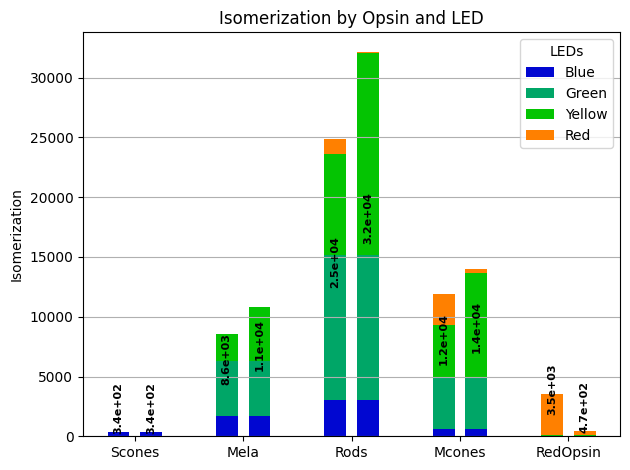

In [9]:
Ptot = [np.array([1, 1, 1, 100]), [1,1,2,10]]

selected_LEDs = ['Blue', 'Green', 'Yellow', 'Red']
selected_opsins = ["Scones", "Mela", "Rods", "Mcones", "RedOpsin"]

plot_isomerisations(Ptot, [selected_LEDs, selected_LEDs], colors={}) #removing all default colors to show the
                                                                     #color infering function
plt.show()

# Solving the system

Searching with step 5:   0%|          | 0/81 [00:00<?, ?it/s]

Searching with step 0.5:   0%|          | 0/27951 [00:00<?, ?it/s]

Searching with step 0.05:   0%|          | 0/53361 [00:00<?, ?it/s]

Searching with step 0.005:   0%|          | 0/53361 [00:00<?, ?it/s]


Ptot with 4 LED Power Values (µW/cm²):
Blue: 1.000
Violet: 0.000
Green: 1.000
Yellow: 0.000

Isomerisation rate:
Scones: 3.4e+02
Mela: 6.3e+03
Rods: 1.5e+04
Mcones: 5.0e+03

Ptot with 4 LED Power Values (µW/cm²):
Blue: 1.000
Violet: 0.000
Green: 1.000
Yellow: 0.000

Isomerisation rate:
Scones: 3.4e+02
Mela: 6.3e+03
Rods: 1.5e+04
Mcones: 5.0e+03


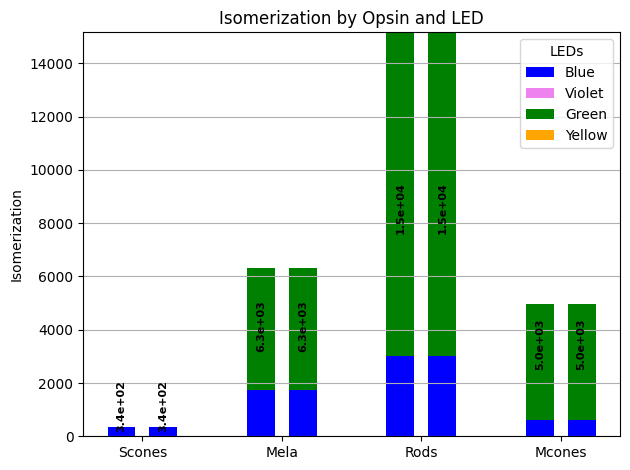

Result isomerisation error to target :

[	0	0	0	0	]


In [10]:
Ptot = np.array([1, 0, 1, 0])
selected_LEDs = ['Blue', 'Violet', 'Green', 'Yellow']

selected_opsins = ["Scones", "Mela", "Rods", "Mcones"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)


system = get_isomerisation_matrix(selected_opsins, selected_LEDs)

solution_Ptot = solve_led_power_brut_force(system, target, high_bounds=10*np.ones(len(selected_LEDs)))




plot_isomerisations([Ptot, solution_Ptot], [selected_LEDs,selected_LEDs], selected_opsins = ["Scones", "Mela", "Rods", "Mcones"])
plt.show()

result = get_isomerisations(solution_Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)

dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")

What happens if we turn off the violet for the second color mix :


Ptot with 4 LED Power Values (µW/cm²):
Blue: 1.000
Violet: 0.000
Green: 1.000
Yellow: 0.000

Isomerisation rate:
Scones: 3.4e+02
Rods: 1.5e+04
Mcones: 5.0e+03
RedOpsin: 3.7e+01


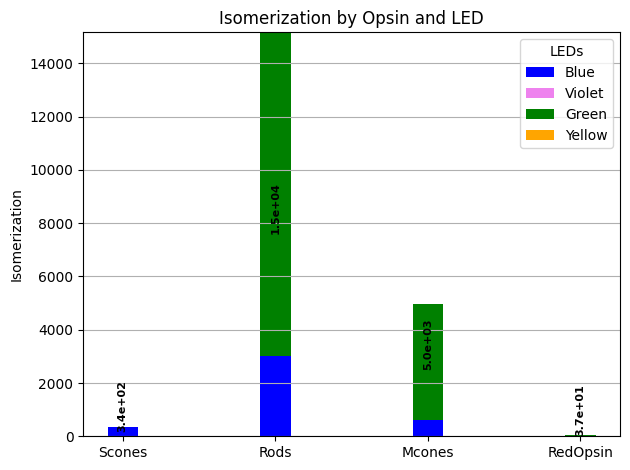

In [11]:
plot_isomerisations(Ptot, selected_LEDs, selected_opsins = ["Scones", "Rods", "Mcones", "RedOpsin"])
plt.show()


Searching with step 1:   0%|          | 0/9261 [00:00<?, ?it/s]

Searching with step 0.1:   0%|          | 0/2541 [00:00<?, ?it/s]

Searching with step 0.01:   0%|          | 0/2541 [00:00<?, ?it/s]

Searching with step 0.001:   0%|          | 0/2541 [00:00<?, ?it/s]

Searching with step 0.0001:   0%|          | 0/2541 [00:00<?, ?it/s]


Ptot with 3 LED Power Values (µW/cm²):
Green: 0.000
Yellow: 0.000
Red: 1500.000

Isomerisation rate:
Scones: 0.0e+00
Rods: 1.9e+04
Mcones: 3.9e+04
RedOpsin: 5.1e+04

Ptot with 3 LED Power Values (µW/cm²):
Blue: 0.000
Green: 0.000
Yellow: 3.677

Isomerisation rate:
Scones: 0.0e+00
Rods: 3.1e+04
Mcones: 1.6e+04
RedOpsin: 1.7e+02


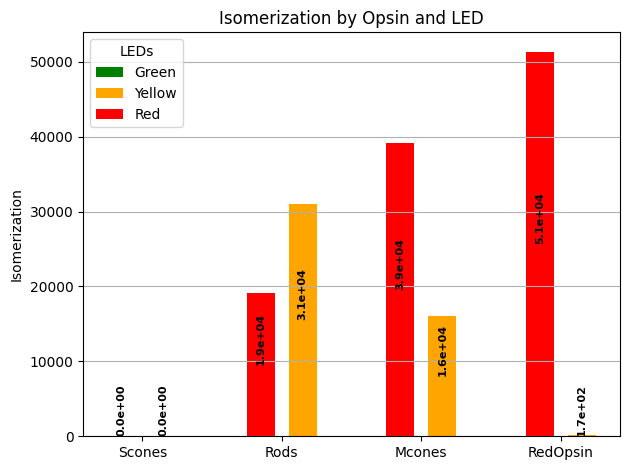

Result isomerisation error to target :

[	0	-23047	11902	]
Total error : -23047


In [12]:
Ptot = np.array([0, 0, 1500])
selected_LEDs = [ 'Green', 'Yellow', 'Red']

selected_opsins = ["Scones", "Mcones", "Rods"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, all_LEDs=selected_LEDs, verbose=False)

selected_LEDs_bis = ['Blue', 'Green', 'Yellow']
system = get_isomerisation_matrix(selected_opsins, selected_LEDs_bis)




solution_Ptot = solve_led_power_brut_force(system, target, high_bounds=20*np.ones(len(selected_LEDs_bis)), initial_step = 1, final_step = 0.001)




plot_isomerisations([Ptot, solution_Ptot], [selected_LEDs,selected_LEDs_bis], selected_opsins = ["Scones", "Rods", "Mcones", "RedOpsin"])
plt.show()

result = get_isomerisations(solution_Ptot, selected_LEDs_bis, selected_opsins = selected_opsins, all_LEDs=list(set(selected_LEDs+selected_LEDs_bis)), verbose=False)

dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")

print(f"Total error : {round(np.sum(dist[:-1]))}")

Or the red while not taking the opsin in the target (ie. OSS)

Searching with step 5:   0%|          | 0/8120601 [00:00<?, ?it/s]

Searching with step 0.5:   0%|          | 0/2541 [00:00<?, ?it/s]

Searching with step 0.05:   0%|          | 0/9702 [00:00<?, ?it/s]

Searching with step 0.005:   0%|          | 0/9702 [00:00<?, ?it/s]


Ptot with 4 LED Power Values (µW/cm²):
Violet: 1.000
Green: 2.000
Yellow: 3.000
Red: 1500.000

Isomerisation rate:
Scones: 1.4e+03
Mcones: 6.1e+04
RedOpsin: 5.2e+04

Ptot with 3 LED Power Values (µW/cm²):
Violet: 1.000
Green: 11.050
Yellow: 2.950

Isomerisation rate:
Scones: 1.4e+03
Mcones: 6.1e+04
RedOpsin: 4.6e+02


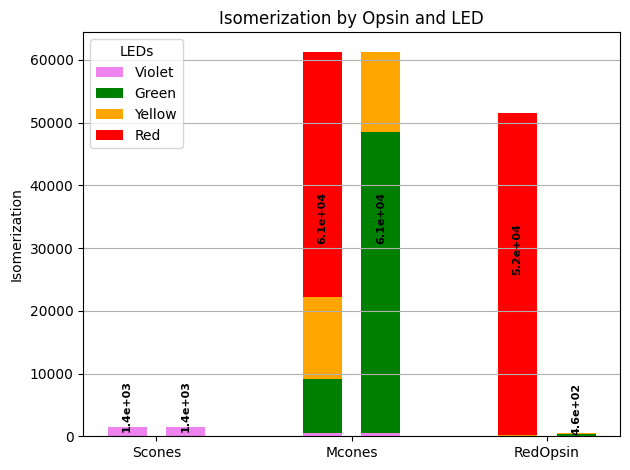

Result isomerisation error to target :

[	1	0	-51081	]
Total error : 1.4665861226339985


In [13]:
Ptot = np.array([1, 2, 3, 1500])
selected_LEDs = ['Violet', 'Green', 'Yellow','Red']

selected_opsins = ["Scones", "Mcones", "RedOpsin"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)

selected_LEDs_bis = ['Violet', 'Green', 'Yellow']
system = get_isomerisation_matrix(selected_opsins[:-1], selected_LEDs_bis)




solution_Ptot = solve_led_power_brut_force(system, target[:-1], high_bounds=1000*np.ones(len(selected_LEDs_bis)))




plot_isomerisations([Ptot, solution_Ptot], [selected_LEDs,selected_LEDs_bis], selected_opsins = selected_opsins)
plt.show()

result = get_isomerisations(solution_Ptot, selected_LEDs_bis, selected_opsins = selected_opsins, verbose=False)

dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")

print(f"Total error : {np.sum(dist[:-1])}")

# Using optimizer


Ptot with 4 LED Power Values (µW/cm²):
Violet: 1.000
Green: 2.000
Yellow: 3.000
Red: 1500.000

Isomerisation rate:
Scones: 1.4e+03
Mcones: 6.1e+04
RedOpsin: 5.2e+04

Ptot with 3 LED Power Values (µW/cm²):
Violet: 0.999
Green: 6.990
Yellow: 6.993

Isomerisation rate:
Scones: 1.4e+03
Mcones: 6.1e+04
RedOpsin: 5.3e+02


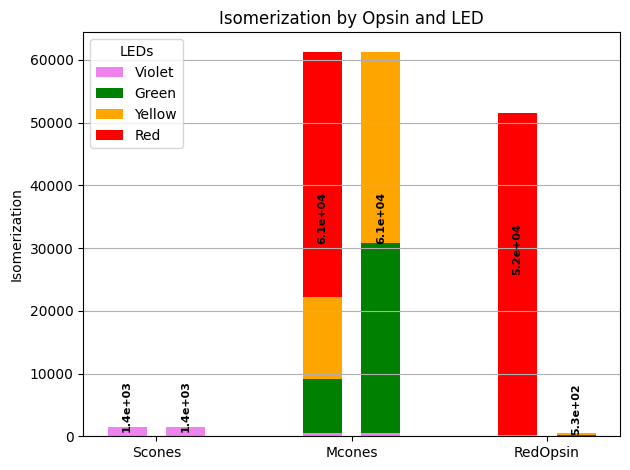

Result isomerisation error to target :

[	-0	-0	-51018	]
Total error : -0.0010531754787734826


In [14]:
Ptot = np.array([1, 2, 3, 1500])
selected_LEDs = ['Violet', 'Green', 'Yellow','Red']

selected_opsins = ["Scones", "Mcones", "RedOpsin"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)

selected_LEDs_bis = ['Violet', 'Green', 'Yellow']
system = get_isomerisation_matrix(selected_opsins[:-1], selected_LEDs_bis)



first_guess = 1*np.ones(len(selected_LEDs_bis))
solution_Ptot,h,g = solve_led_power_with_guess(system, target[:-1], first_guess, high_bounds=1000*np.ones(len(selected_LEDs_bis)))




plot_isomerisations([Ptot, solution_Ptot], [selected_LEDs,selected_LEDs_bis], selected_opsins = selected_opsins)
plt.show()

result = get_isomerisations(solution_Ptot, selected_LEDs_bis, selected_opsins = selected_opsins, verbose=False)

dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")

print(f"Total error : {np.sum(dist[:-1])}")

Searching with step 5:   0%|          | 0/81 [00:00<?, ?it/s]

Searching with step 0.5:   0%|          | 0/27951 [00:00<?, ?it/s]

Searching with step 0.05:   0%|          | 0/27951 [00:00<?, ?it/s]

Searching with step 0.005:   0%|          | 0/27951 [00:00<?, ?it/s]


Ptot with 5 LED Power Values (µW/cm²):
Violet: 1.000
Blue: 1.000
Green: 1.000
Yellow: 1.000
Red: 1000.000

Isomerisation rate:
Rods: 3.8e+04
Mcones: 3.6e+04
RedOpsin: 3.4e+04

Ptot with 4 LED Power Values (µW/cm²):
Violet: 0.000
Blue: 0.000
Green: 0.000
Yellow: 5.291

Isomerisation rate:
Rods: 4.5e+04
Mcones: 2.3e+04
RedOpsin: 2.4e+02

Ptot with 4 LED Power Values (µW/cm²):
Violet: 0.000
Blue: 0.000
Green: 0.000
Yellow: 5.290

Isomerisation rate:
Rods: 4.5e+04
Mcones: 2.3e+04
RedOpsin: 2.4e+02


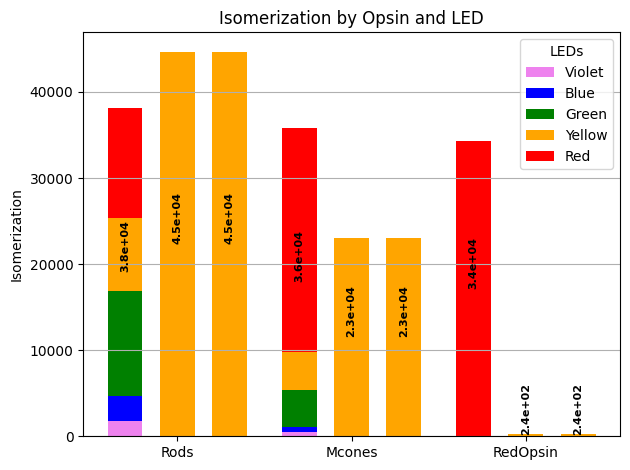

Result isomerisation error to target :

[	6590	-12760	-34077	]
Total error : -6170


In [15]:
Ptot = np.array([ 1,1,1, 1, 1000])
selected_LEDs = ['Violet', 'Blue','Green', 'Yellow','Red']


selected_opsins = ["Rods", "Mcones", "RedOpsin"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, all_LEDs=selected_LEDs, verbose=False)

selected_LEDs_bis = ['Violet', 'Blue', 'Green', 'Yellow']
system = get_isomerisation_matrix(selected_opsins[:-1], selected_LEDs_bis)



first_guess = 5*np.ones(len(selected_LEDs_bis))
solution_Ptot,hist,g = solve_led_power_with_guess(system, target[:-1], first_guess, high_bounds=10*np.ones(len(selected_LEDs_bis)))

solution_Ptot_brutforce = solve_led_power_brut_force(system, target[:-1], high_bounds=10*np.ones(len(selected_LEDs_bis)))


plot_isomerisations([Ptot, solution_Ptot, solution_Ptot_brutforce], [selected_LEDs,selected_LEDs_bis, selected_LEDs_bis], selected_opsins = selected_opsins, all_LEDs=selected_LEDs )
plt.show()
plt.close('all')
result = get_isomerisations(solution_Ptot, selected_LEDs_bis, selected_opsins = selected_opsins, verbose=False)



dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")
print(f"Total error : {round(np.sum(dist[:-1]))}")

Searching with step 5:   0%|          | 0/2525 [00:00<?, ?it/s]

Searching with step 0.5:   0%|          | 0/1331 [00:00<?, ?it/s]

Searching with step 0.05:   0%|          | 0/2772 [00:00<?, ?it/s]

Searching with step 0.005:   0%|          | 0/231 [00:00<?, ?it/s]


Ptot with 3 LED Power Values (µW/cm²):
Green: 0.619
Yellow: 1.727
Red: 1.184

Isomerisation rate:
Scones: 0.0e+00
Rods: 2.2e+04
Mcones: 1.0e+04
RedOpsin: 1.4e+02

Ptot with 3 LED Power Values (µW/cm²):
Green: 0.619
Yellow: 1.727
Red: 1.184

Isomerisation rate:
Scones: 0.0e+00
Rods: 2.2e+04
Mcones: 1.0e+04
RedOpsin: 1.4e+02

Ptot with 3 LED Power Values (µW/cm²):
Green: 0.000
Yellow: 0.000
Red: 1000.000

Isomerisation rate:
Scones: 0.0e+00
Rods: 1.3e+04
Mcones: 2.6e+04
RedOpsin: 3.4e+04

Ptot with 3 LED Power Values (µW/cm²):
Green: 0.000
Yellow: 1.225
Red: 500.000

Isomerisation rate:
Scones: 0.0e+00
Rods: 1.7e+04
Mcones: 1.8e+04
RedOpsin: 1.7e+04


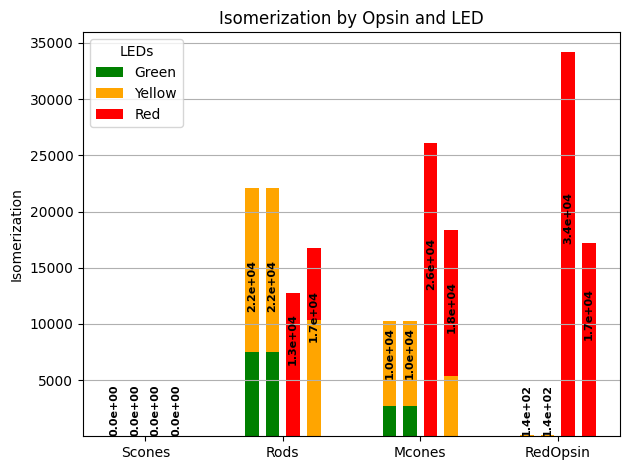

Result isomerisation error to target :

[	0	9352	-15805	-34094	]
Total error : 25157

Result isomerisation error to target :

[	0	3962	-7685	-17060	]
Total error : 11647


In [16]:
Ptot = np.array([ 0, 0, 1000])
selected_LEDs = ['Green', 'Yellow','Red']


selected_opsins = ["Scones", "Rods", "Mcones", "RedOpsin"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, all_LEDs=selected_LEDs, verbose=False)

selected_LEDs_bis = ['Green', 'Yellow','Red']
system = get_isomerisation_matrix(selected_opsins[:-1], selected_LEDs_bis)



first_guess = 5*np.ones(len(selected_LEDs_bis))
solution_Ptot,hist,g = solve_led_power_with_guess(system, target[:-1], first_guess, high_bounds=100*np.ones(len(selected_LEDs_bis)))

solution_Ptot_brutforce = solve_led_power_brut_force(system, target[:-1], high_bounds=np.concatenate((20*np.ones(len(selected_LEDs_bis)-1),[500])))


plot_isomerisations([solution_Ptot, solution_Ptot, Ptot, solution_Ptot_brutforce], [selected_LEDs_bis, selected_LEDs_bis, selected_LEDs, selected_LEDs_bis], selected_opsins = selected_opsins, all_LEDs=selected_LEDs )
plt.show()
plt.close('all')


result = get_isomerisations(solution_Ptot, selected_LEDs_bis, selected_opsins = selected_opsins, verbose=False)



dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")
print(f"Total error : {round(np.sum(np.abs(dist[:-1])))}")


result = get_isomerisations(solution_Ptot_brutforce, selected_LEDs_bis, selected_opsins = selected_opsins, verbose=False)

dist = result - target
print("\nResult isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")
print(f"Total error : {round(np.sum(np.abs(dist[:-1])))}")


# Using `get_mix_color` to Compute LED Power Mix

The `get_mix_color` function is designed to compute the optimal power mix of LEDs required to achieve a **target isomerisation rate** for selected opsins. It simplifies the process of solving for LED power levels by internally using `solve_led_power_with_guess`, while still allowing users to customize various parameters to fine-tune their results.

---

## 🔹 Key Features
- **Automatic LED Power Optimization**  
  Computes the best power distribution for the selected LEDs to match the given **isomerisation target**.

- **Flexible Mixing Strategies**  
  Different weighting strategies allow users to prioritize certain LEDs:
  - `"balance"` → Equal contribution across LEDs.
  - `"violet_over_red"` → More weight to **violet** LEDs.
  - `"red_over_violet"` → More weight to **red** LEDs.
  - **Custom priority vector** → Define your own LED priority.

- **Custom Data Support**  
  The function can work with **custom opsin spectral data** and **LED spectral profiles** by specifying file paths.

- **Fine-Tuned Solver Control**  
  You can set **lower/upper bounds** for LED powers, adjust **initial guesses**, and define **custom collecting areas** for opsins.

---

## 🔹 Basic Usage Example
```python
led_powers = get_mix_color(
    isomerisation_target={"S-opsin": 1.2, "M-opsin": 0.8},  # Target isomerisation rates
    selected_LEDs=["LED1", "LED2", "LED3"],  # Choose specific LEDs
    mix_type="balance",  # Choose a mixing strategy
    opsinDATA_path="custom_opsin_data.pkl",  # Path to opsin spectral data
    ledDATA_path="custom_led_data.pkl",  # Path to LED spectral data
)
```
---
## Description
```python
def get_mix_color(
    isomerisation_target, 
    selected_LEDs = None, 
    mix_type = None, 
    opsinDATA_path = None, 
    ledDATA_path=None, 
    acDATA=None, 
    x_axis="x_axis", 
    low_bounds = None,
    high_bounds = None,
    initial_guess = None):
```



## 🔹 Additional Notes
The function internally calls get_isomerisation_matrix to compute isomerisation rates.
If solving fails, an error message is printed, and the function returns None.
If an invalid mix_type is provided, a warning is displayed, and all LED weights default to zero.
For a full list of parameters, refer to the function docstring. 🚀



Searching with step 5:   0%|          | 0/81 [00:00<?, ?it/s]

Searching with step 0.5:   0%|          | 0/27951 [00:00<?, ?it/s]

Searching with step 0.05:   0%|          | 0/101871 [00:00<?, ?it/s]

Searching with step 0.005:   0%|          | 0/106722 [00:00<?, ?it/s]


Ptot with 4 LED Power Values (µW/cm²):
Violet: 1.000
Blue: 2.000
Green: 3.000
Yellow: 4.000

Isomerisation rate:
Scones: 2.1e+03
Mela: 2.7e+04
Rods: 7.8e+04
Mcones: 3.2e+04

Ptot with 4 LED Power Values (µW/cm²):
Violet: 0.000
Blue: 6.450
Green: 0.795
Yellow: 5.750

Isomerisation rate:
Scones: 2.2e+03
Mela: 2.8e+04
Rods: 7.8e+04
Mcones: 3.3e+04


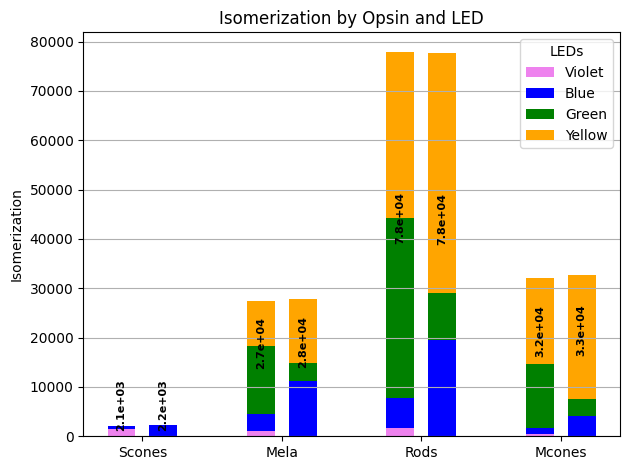

Result isomerisation error to target :

[	72	474	-310	409	]


In [17]:
Ptot = np.array([1, 2, 3, 4])
selected_LEDs = ['Violet', 'Blue', 'Green', 'Yellow']

selected_opsins = ["Scones", "Mela", "Rods", "Mcones"]


target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)


system = get_isomerisation_matrix(selected_opsins, selected_LEDs)

solution_Ptot = solve_led_power_brut_force(system, target, high_bounds=10*np.ones(len(selected_LEDs)))




plot_isomerisations([Ptot, solution_Ptot], [selected_LEDs,selected_LEDs], selected_opsins = ["Scones", "Mela", "Rods", "Mcones"])
plt.show()

result = get_isomerisations(solution_Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)

dist = result - target
print("Result isomerisation error to target :\n")
print("[\t" + "\t".join([f"{elem:.0f}" for elem in dist]) + "\t]")

In [18]:
Ptot = np.array([1, 2, 3, 4])
selected_LEDs = ['Violet', 'Blue', 'Green', 'Yellow']
selected_opsins = ["Scones", "Mela", "Rods", "Mcones"]

target = get_isomerisations(Ptot, selected_LEDs, selected_opsins = selected_opsins, verbose=False)

LED Power Mix:
Violet: 1.20 µW/cm²
Blue: 1.21 µW/cm²
Green: 3.39 µW/cm²
Yellow: 3.69 µW/cm²
Red: 1.02 µW/cm²

Ptot with 4 LED Power Values (µW/cm²):
Violet: 1.000
Blue: 2.000
Green: 3.000
Yellow: 4.000

Isomerisation rate:
Scones: 2.1e+03
Mela: 2.7e+04
Rods: 7.8e+04
Mcones: 3.2e+04
RedOpsin: 2.9e+02

Ptot with 5 LED Power Values (µW/cm²):
Violet: 1.201
Blue: 1.205
Green: 3.391
Yellow: 3.685
Red: 1.017

Isomerisation rate:
Scones: 2.1e+03
Mela: 2.7e+04
Rods: 7.8e+04
Mcones: 3.2e+04
RedOpsin: 3.2e+02


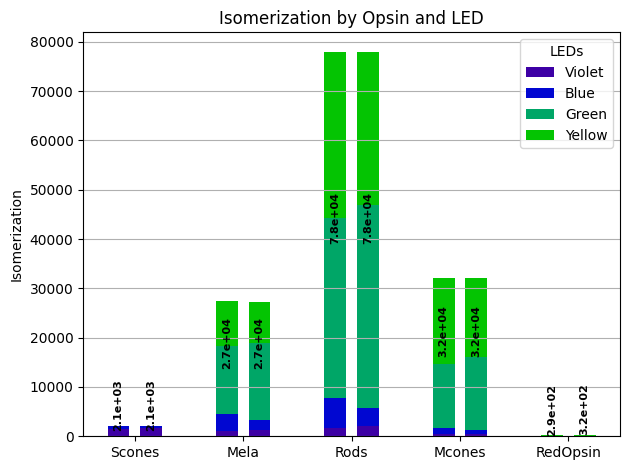

In [19]:
isomerisation_target = {
    "Scones":target[0],
    "Mela":target[1],
    "Rods":target[2],
    "Mcones":target[3]
}

Ptot_solution = get_mix_color(isomerisation_target)

plot_isomerisations([Ptot, Ptot_solution], [selected_LEDs,['Violet', 'Blue', 'Green', 'Yellow', 'Red']], colors={})
plt.show()
plt.close('all')